<div style="padding: 20px 0; text-align: center; font-weight: bold; font-size: 170%; background-color: #1d4055; color: #ffffff;"> 1.04. Προγραμματισμός - Έλεγχος ροής</div>

Το SageMath είναι υλοποιημένο στην γλώσσα προγραμματισμού Python. Έτσι, μπορεί κανείς να γράψει κώδικα Python απευθείας μέσα στο περιβάλλον του, που, επιπλέον, επεκτείνει την γλώσσα με πολλές χρήσιμες για τα μαθηματικά λειτουργίες.

# Preparser

Στο SageMath, ο **preparser** εκτελείται ένα στάδιο πριν την εκτέλεση του κώδικα, και αναλαμβάνει να μετατρέπει ορισμένες συντομεύσεις ή ειδική σύνταξη SageMath σε Python. Έτσι για παράδειγμα αν γράψουμε _π_ ο preparser θα το μετατρέψει σε pi.

## Raw literals

Σε μια σταθερά, για παράδειγμα, 2.71 ο τύπος `float` της python θα μετατραπεί σε `sage.rings.real_mpfr.RealLiteral`. Αν θέλουμε να μην εκτελεστεί ο preparser, ο απλούστερος τρόπος είναι να προσθέσουμε ένα `r` (ή `R`) δεξιά της σταθεράς. Στην περίπτωση αυτή ο τύπος της σταθεράς θα είναι `float` που είναι ο εξορισμού τύπος της Python για πραγματικές σταθερές.

In [ ]:
type(2.71),type(2.71r),type(2.71R)

**Παράδειγμα**

Στην συνέχεια αρχικοποιούνται δύο μεταβλητές με τιμή 5. Στην πρώτη περίπτωση εκτελείται κανονικά ο προεπεξεργαστής με αποτέλεσμα να μετατρέψει τον τύπο `int` της python σε `sage.rings.integer.Integer`. Στη δεύτερη ο τύπος παραμένει `int`.

In [ ]:
a = 5;b=5r
type(a),type(b)

Είναι πιθανό να μην επιθυμούμε την επιπλέον λειτουργικότητα των αντικειμένων του SageMath αλλά ταχύτητα. Σε αυτές τις περιπτώσεις μπορούμε να κάνουμε χρήση των απλών ακεραίων ή πραγματικών αντί για τα πιο πολύπλοκα `Integer` ή `RealLiteral`. Τα τελευταία, όμως, μας προσφέρουν επιπλέον λειτουργικότητα.

**Παράδειγμα**

Ο τύπος `sage.rings.integer.Integer` διαθέτει μια σειρά από μεθόδους που δεν μπορούν να εφαρμοστούν στον απλό τύπο `int` της python. Αν στο δεύτερο τμήμα κώδικα, που χρησιμοποιούμε **raw literal**, βγάλουμε από τα σχόλια τις μεθόδους που χρησιμοποιήσαμε στο πρώτο τμήμα θα προκύψει `AttributeError`. Σημειώνουμε ότι οι μέθοδοι `sqrt` και `mod` των `Integer` του Sage, που χρησιμοποιούνται στο παράδειγμα, επιστρέφουν την τετραγωνική ρίζα και το υπόλοιπο του αριθμού με την παράμετρο αντίστοιχα.

In [ ]:
a = 16
a.sqrt(),a.mod(3)

In [ ]:
a = 16r
#a.sqrt(),a.mod(3)

## Ενεργοποίηση, Απενεργοποίηση preparser

Η μέθοδος `preparser` με παράμετρο `True` (`False`) ενεργοποιεί (απενεργοποιεί) τον προεπεξεργαστή. Κάτι τέτοιο μπορεί να φανεί χρήσιμο όταν θέλουμε να δουλέψουμε καθαρά σε Python χωρίς τις αυτόματες μετατροπές του Sage. Σημειώνεται ότι στο online περιβάλλον https://sagecell.sagemath.org/ ο **preparser** δεν μπορεί να απενεργοποιηθεί.

**Παράδειγμα**

Στο επόμενο παράδειγμα απενεργοποιείται ο preparser και εμφανίζονται τα αποτελέσματα στην λογική της python. Έπειτα τον ενεργοποιούμε και πάλι και παρατηρούμε, για τις ίδιες πράξεις τι επιστρέφει το SageMath. Η Python σε μια εφαρμογή του τελεστή της διαίρεσης θα επιστρέψει πραγματικό αριθμό ενώ το Sage, για να μην χάσουμε σε ακρίβεια, ρητό. Επίσης, υπενθυμίζεται ότι ο τελεστής `^` εκτελεί την δύναμη στο Sage αλλά όπως θα δούμε αμέσως μετά είναι ο λογικός τελεστής **xor** (αποκλειστικό ή) στην κλασική python.

In [ ]:
preparser(False)

In [ ]:
2/3,2^3

In [ ]:
preparser(True)

In [ ]:
2/3,2^3

## Μέθοδος preparse

Η μέθοδος `preparse` δείχνει πως ο preparser του Sage μεταφράζει μια έκφραση που γράφεται σε Sage ώστε να την καταλάβει η Python. Έτσι, για παράδειγμα ο τελεστής `^` μετατρέπεται στον ισοδύναμο `**` που όμως είναι ο μόνος τελεστής δύναμης στην Python.

In [ ]:
preparse('2/3'),preparse('2^3')

# Τελεστές

## Συγκριτικοί τελεστές

Στις δομές επανάληψης όπως η `while` αλλά και στις δομές επιλογής όπως η `if` που θα δούμε στην συνέχεια, χρησιμοποιούμε πολύ συχνά τους συγκριτικούς τελεστές:

| Συγκριτικός Τελεστής | Περιγραφή                          |
|----------------------|------------------------------------|
| `==`             | Ισότητα                            |
| `!=`             | Ανισότητα                          |
| `<`              | Μικρότερο από                      |
| `>`              | Μεγαλύτερο από                     |
| `<=`             | Μικρότερο ή ίσο από                |
| `>=`             | Μεγαλύτερο ή ίσο από               |

Οι συγκριτικοί τελεστές επιστρέφουν λογική τιμή `True` ή `False` ανάλογα.

In [ ]:
a = 5
b = 3
a == b, a != b, a < b,a > b,a <= 5, b >= 4

## Λογικοί τελεστές

Σε περίπτωση που η λογική πράξη είναι πιο πολύπλοκη χρησιμοποιούμε λογικούς τελεστές. Στον επόμενο πίνακα οι λογικοί τελεστές που παρουσιάζονται με την σειρά προτεραιότητάς τους.

| Τελεστής | Ονομασία       | Περιγραφή                                        |
|----------|----------------|--------------------------------------------------|
| `not`    | Λογικό Όχι     | Αντιστρέφει την τιμή (True → False, False → True)|
| `and`    | Λογικό Και     | True αν και οι δύο εκφράσεις είναι True          |
| `or`     | Λογικό Ή       | True αν μία τουλάχιστον έκφραση είναι True       |



Στον επόμενο πίνακα αλήθειας φαίνεται το αποτέλεσμα των λογικών πράξεων ανάλογα με τις τιμές εισόδου A και B.

| A     | B     |  A and B  | A or B  | not A  |
|-------|-------|------------------------|-----------------------|--------------------|
| False | False | False                  | False                 | True               |
| False | True  | False                  | True                  | True               |
| True  | False | False                  | True                  | False              |
| True  | True  | True                   | True                  | False              |

**Παράδειγμα**

Να εκφραστούν οι επόμενες λογικές προτάσεις με την βοήθεια συγκριτικών και λογικών τελεστών.

1. Ο αριθμός a είναι θετικός και ζυγός.

2. Ο αριθμός a είναι διψήφιος.

3. Ο αριθμός a **δεν** βρίσκεται στο διάστημα $[0,100]$.

4. Οι αριθμοί a, b είναι θετικοί και δεν είναι ίσοι μεταξύ τους.

5. Ο a είναι θετικός και πολλαπλάσιο του 3.

Θα δοκιμαστούν, έστω για τιμές a=17, b=8.

In [ ]:
a,b = 17,8

In [ ]:
# 1
a > 0 and a % 2 == 0

In [ ]:
# 2
10 <= a <= 100

In [ ]:
# 3
a<0 or a>100

In [ ]:
# 4
not a==b and a>0 and b>0

In [ ]:
# 5
a>0 and a%3==0

## bitwise τελεστές

Οι bitwise τελεστές δουλεύουν **σε επίπεδο bit** και εφαρμόζουν λογικές πράξεις σε κάθε αντίστοιχο ζεύγος bit δύο αριθμών.

| Τελεστής | Ονομασία        | Περιγραφή                                                   |
|----------|-----------------|-------------------------------------------------------------|
| `&`      | Bitwise AND     | Το bit γίνεται 1 αν όλα τα bits είναι 1                 |
| `\|`      | Bitwise OR      | Το bit γίνεται 1 αν τουλάχιστον ένα από τα bits είναι 1 |
| `^^`     | Bitwise XOR     | Το bit γίνεται 1 αν περιττός αριθμός από bits είναι 1     |
| `~`      | Bitwise NOT     | Αντιστρέφει κάθε bit (0 → 1, 1 → 0)                         |
| `<<`     | Shift left      | Ολισθαίνει όλα τα bits αριστερά                              |
| `>>`     | Shift right     | Ολισθαίνει όλα τα bits δεξιά                                 |





Έστω $A$ και $B$ bits (0 ή 1), ακολουθεί πίνακας αλήθειας για bitwise τελεστές

| A | B | A & B | A \| B | A ^^ B | ~A |
|---|---|-------|--------|--------|----|
| 0 | 0 |   0   |   0    |   0    |  1 |
| 0 | 1 |   0   |   1    |   1    |  1 |
| 1 | 0 |   0   |   1    |   1    |  0 |
| 1 | 1 |   1   |   1    |   0    |  0 |


- Ο τελεστής `~` είναι **μονοσήμαντος** (ενεργεί μόνο σε ένα bit κάθε φορά).
- Στους τελεστές `<<` και `>>` δεν βρίσκει εφαρμογή ο πίνακας αλήθειας, γιατί μετακινούν ολόκληρους τους δυαδικούς αριθμούς (π.χ. $1011 << 1 = 10110$).

**Παράδειγμα**

Για παράδειγμα για τους αριθμούς:

- $5_{10} = 101_{2}$

- $3_{10} = 011_{2}$

Bitwise and (`&`):
$$
\begin{array}{c}
101 \quad (5) \\
011 \quad (3) \\
\hline
001 \quad (1) \\
\end{array}
$$

Bitwise OR (`|`):
$$
\begin{array}{c}
101 \quad (5) \\
011 \quad (3) \\
\hline
111 \quad (7) \\
\end{array}
$$

Bitwise XOR (`^^`)
$$
\begin{array}{c}
101 \quad (5) \\
011 \quad (3) \\
\hline
110 \quad (6) \\
\end{array}
$$

Bitwise NOT (`~`)
$$
0b0...1000 \ (8) \xrightarrow{\text{NOT}} 0b1...0111 \quad \text{ή} \quad -9
$$

Bitwise shift left (`<<`):
$$
101 \ (5) << 1 = 1010 \ (10)
$$

Bitwise shift right (`>>`):
$$
101 \ (5) >> 1 = 10 \ (2)
$$

Σημείωση: Στην python ο τελεστής `^` δεν χρησιμοποιείται για δύναμη αλλά για bitwise or. Έτσι δεν υπάρχει ανάγκη χρήσης του `^^` όπως στο SageMath.

In [ ]:
5&3,5|3,5^^3,5<<1,5>>1

Η συμπεριφορά του τελεστή `~` στο SageMath έχει διαφορές σε σχέση με αυτή στην Python. Αυτό συμμβαίνει λόγω του **preparser**. Αν δεν τον αγνοήσουμε χρησιμοποιώντας **raw literal**, περίπτωση 8r, ο τελεστής θα επιστρέψει τον αντίστροφο του αριθμού ως προς τον πολλαπλασιασμό μην κάνοντας bitwise πράξη.

In [ ]:
a = 8r;b=8
~a,~b

# Δομές επανάληψης

Οι υπολογιστές είναι πολύ καλοί στο να εκτελούν επαναλαμβανόμενες, ίδιες ή παρόμοιες, εργασίες γλιτώνοντας τον άνθρωπο από κουραστικές, βαρετές εργασίες. Οι εντολές που καθοδηγούν τον υπολογιστή στο να εκτελέσει κάτι επαναλαμβανόμενο είναι η `for` και η `while`. Και οι δυο αποτελούν εντολές της Python που, φυσικά, μπορούν να χρησιμοποιηθούν στο SageMath.

## for

Η for αποτελεί εντολή βολική για επαναλήψεις (loops) προκαθορισμένου πλήθους φορών.
Η γενική της μορφή είναι:
```
for < var > in <collection>:
    <loop body>
```

Η `<collection>` είναι μια συλλογή από αντικείμενα, για παράδειγμα μια λίστα (οπότε τα αντικείμενα της περικλείονται σε μέσα σε `[`, `]` ) ή μια πλειάδα (οπότε τα αντικείμενά της περικλείονται μέσα σε `(`, `)` ). 

Το `<loop body>` είναι το σώμα του βρόχου. Εδώ βρίσκονται όλες οι εντολές (η μια ακριβώς κάτω από την άλλη) που θέλουμε να εκτελεστούν ομαδικά και από μια φορά, για κάθε στοιχείο της <collection>. Η `<var>` είναι μια μεταβλητή που λέγεται μεταβλητή βρόχου, και παίρνει ως τιμή διαδοχικά όλα τα στοιχεία της συλλογής <collection>. Για κάθε νέα τιμή της μεταβλητής, εκτελούνται κατά σειρά όλες οι εντολές του `<loop body>`. Η `for` σταματάει όταν η μεταβλητή `<var>` έχει εξαντλήσει όλα τα στοιχεία της συλλογής. Η μεταβλητή βρόχου `<var>` δεν είναι απαραίτητο να δηλωθεί και όταν δεν χρησιμοποιείται μέσα στον βρόχο μπορεί να αντικατασταθεί από το σύμβολο `_`.

## indentation, εσοχή

Το βασικό που πρέπει να θυμόμαστε για την `for`, για την `while`, αλλά και για πολλές άλλες εντολές της python (όπως η `if`) είναι ότι το όλο το σώμα της εντολής πρέπει να βρίσκεται σε **εσοχή**, **indentation**, δηλαδή να γράφεται κάτω από την εντολή και **δεξιότερα** απ’ αυτήν! Αυτό βοηθά την python να καθορίσει ακριβώς το σώμα της εντολής, και άρα να καθορίσει ποιες εντολές ανήκουν και ποιες δεν ανήκουν στην εντολή. Φυσικά αυτό βοηθά οπτικά και εμάς ώστε να εντοπίσουμε εύκολα ποιες ανήκουν στο σώμα της εντολής (από τις υπόλοιπες που δεν έχουν σχέση με την εντολή)!

Χρησιμοποιώντας το tab στο πληκτρολόγιο μπορούμε να στοιβάξουμε όλες τις εντολές του σώματος της εντολής ακριβώς την μια κάτω από την άλλη και στην ίδια κάθετη ευθυγράμμιση! Φυσικά αυτή η ευθυγράμμιση πρέπει να βρίσκεται οπωσδήποτε δεξιότερα της λέξης της εντολής (`for`, `while` κοκ.). Τα παραδείγματα των σημειώσεων αποτελούν καλή επίδειξη για το πώς στοιβάζουμε τα σώματα μέσα στις παραπάνω εντολές. Στο παράδειγμα του υπολογισμού του δείκτη μάζας σώματος που ακολουθεί, χρησιμοποιούμαι δυο `if`, το ένα μέσα στο άλλο. Όλο το σώμα του εσωτερικού `if` βρίσκεται δεξιότερα του δευτέρου `if`, το οποίο βρίσκεται δεξιότερα του πρώτου `if`! Αν υποθέσουμε ότι μέσα στο δεύτερο `if` υπήρχε ένα `for`, τότε το σώμα του θα έπρεπε να είναι δεξιότερα του `for` και άρα δεξιότερα και από τα δυο `if`!

Ένα από τα κλασικότερα λάθη που θα συναντήσει ένας προγραμματιστής είναι το `IndentationError` που είναι ακριβώς αυτό που εννοεί το όνομα, σφάλμα εσοχής.

**Παράδειγμα**

Στο επόμενο παράδειγμα φτιάχνουμε μια λίστα a από συμβολοσειρές, `str`, και τα εκτυπώνουμε διαδοχικά χρησιμοποιώντας την εντολή επανάληψης `for` που το σώμα της περιέχει την εντολή εκτύπωσης `print`, για κάθε αντικείμενο i της λίστας a. Το ρόλο της μεταβλητής βρόχου το παίζει η i. Η i παίρνει διαδοχικά τις τιμές 'Δοκιμάζω', 'να',..., 'με την print' και συγχρόνως εκτελείται το σώμα της `for` που στην περίπτωσή μας αποτελείται μόνο από μια εντολή δηλαδή την `print`. Για μια εκτύπωση που πιάνει λιγότερο χώρο έχει προστεθεί η παράμετρος `end` που, υπενθυμίζεται, αλλάζει τον εξορισμού διαχωρισμό μεταξύ εκτυπώσεων.

In [ ]:
a = ['Δοκιμάζω', 'να', 'εκτυπώσω','κάμποσες','λέξεις', 'με την print']
for i in a:
    print(i,end=', ')

Αν το `<loop body>` περιέχει μια (ή λίγες χωρισμένες με `;`) εντολές τότε μπορεί να τοποθετηθεί στην ίδια γραμμή με την εντολή `for`.

In [ ]:
for i in a: print(i,end=', ')

Στην παραπάνω `for` η εντολή `print`, που εκτελείται επαναληπτικά, βρίσκεται δίπλα από την `for`. Θεωρείται καλή πρακτική, ειδικά όταν θέλουμε να εκτελεστούν πολλές εντολές μέσα στην επανάληψη, οι εντολές να γράφονται σε ξεχωριστές γραμμές και κάτω από την `for`. Θα έπρεπε όμως να υπάρχει μία εσοχή, συνήθως ένα tab, το οποίο και διατηρείται στη διάρκεια της επανάληψης.

Η `<collection>` τις περισσότερες φορές κατασκευάζεται αυτόματα με κατάλληλες εντολές, ώστε να μην αναγκάζεται ο προγραμματιστής να καταγράφει ένα - ένα τα στοιχεία της `<collection>`. Ο πιο διαδεδομένος τρόπος αυτόματης κατασκευής είναι η `range`.

## range

Η εντολή `range` είναι μια από τις εντολές της python για την κατασκευή πεπερασμένων συλλογών από (ακέραιους) αριθμούς. Η απλούστερη μορφή της είναι η `range(όριο)` που κατασκευάζει μια λίστα από όλους τους διαδοχικούς φυσικούς 0,1,.. που είναι μικρότεροι από το όριο.

**Παράδειγμα**

Η επόμενη δομή εμφανίζει τα τέλεια τετράγωνα από το 0 έως το m-1=10, αφού έχουμε θέσει ως όριο το m=11.

In [ ]:
m=11
for i in range(m): print(i^2,end=" ")

Η γενική μορφή της `range` είναι: `range(αρχή, όριο, βήμα)` όπου ο ακέραιος αριθμός **όριο** είναι το άνω φράγμα των όρων της αριθμητικής ακολουθίας αρχή, αρχή + βήμα, αρχή+2*βήμα, αρχή+3*βήμα,... Με άλλα λόγια κανένας όρος της προηγούμενης ακολουθίας δεν μπορεί να είναι **ίσος** ή **μεγαλύτερος** από το όριο. Αν, όμως, το βήμα είναι αρνητικό το όριο αποτελεί το κάτω φράγμα τον όρων και κανένας όρος δεν μπορεί να είναι **ίσος** ή **μικρότερος** από το όριο.

Οι (ακέραιες) παράμετροι αρχή και βήμα είναι προαιρετικοί. Οι εξ’ ορισμού τιμές τους είναι 0 και 1 αντίστοιχα.

In [ ]:
for i in range(10,0,-1): 
    print(i, end= " ")

**Παράδειγμα**

Στο επόμενο παράδειγμα υπάρχουν δυο εντολές `print`, η πρώτη εντός του σώματος της `for` και η δεύτερη εκτός. Η 1η `print` εκτελείται επαναληπτικά είκοσι φορές, ενώ η 2η μόνο μία, εφόσον δεν είναι σε εσοχή δηλ. δεν βρίσκεται δεξιότερα της for και κάτω ακριβώς της πρώτης print (και άρα δεν ανήκει στο <loop body>). Αυτή η `print` θα εκτελεστεί **μετά** το τέλος της επανάληψης. Μπορείτε να δοκιμάσετε να δείτε τι θα συμβεί αν και η 2η `print` γραφτεί δεξιότερα, δηλαδή ενσωματωθεί στο σώμα της `for` (γράφοντάς την ακριβώς κάτω από την πρώτη `print`).

In [ ]:
for i in range(5,105,5): 
    print(i, end= " ")
print('Φτου και βγαίνω')

**Παράδειγμα**

Στο επόμενο παράδειγμα εμφανίζονται οι τιμές της $x^2-x$ για x ακέραιο από -5 μέχρι και 5.

In [ ]:
f(x)=x^2-x
for i in range(-5,6):
    print('f(',i,')=',f(i), sep='', end= " ")

Η `range` δέχεται, δυστυχώς, μόνο ακέραιους παραμέτρους. Μπορούμε όμως να χρησιμοποιήσουμε τους ακέραιους της λίστας που κατασκευάσαμε ώστε να ορίσουμε και μη ακέραιες τιμές. Στο επόμενο παράδειγμα η μεταβλητή βρόχου είναι η i. Με την μεταβλητή v παίρνουμε το 0.5*i, δηλαδή το μισό της i, και εκτυπώνουμε την f(v). Προσέξτε ότι όλες οι εντολές του σώματος της `for` (`<loop body>`) είναι τέλεια ευθυγραμμισμένες κάτω και δεξιότερα της `for`!

In [ ]:
f(x)=x^2-x
for i in range(-10,11):
    v=0.5*i
    print('f(',v,')=',f(v), sep='', end= " ")

Στην πραγματικότητα, ο παραπάνω είναι ο τρόπος με τον οποίο σχεδιάζονται οι γραφικές παραστάσεις. Αποτιμώνται οι συναρτήσεις σε αρκετά σημεία τα οποία στην συνέχεια σχεδιάζονται (τα σημεία ενώνονται με ευθύγραμμα τμήματα, έτσι ώστε το γράφημα να είναι συνεχές). 

In [ ]:
f(x)=x^2-x
g = Graphics()
for i in range(-10,11):
    v=0.5*i
    g += point((v, f(v)), size=20, rgbcolor='red')
g.show(figsize=(4,3))

Υπάρχει περίπτωση να επιθυμούμε την αποτίμηση της παραπάνω συνάρτησης σε συγκεκριμένες τιμές και όχι αναγκαστικά σε ισαπέχουσες τιμές όπως είδαμε παραπάνω. Τότε η for πρέπει να συνδυαστεί με μια λίστα τιμών. Οι λίστες θα αναλυθούν περισσότερο στην επόμενη ενότητα. Στο παρακάτω παράδειγμα η μεταβλητή βρόχου i παίρνει διαδοχικά όλες τις τιμές -1, 0,..,12/5 που εμφανίζονται μέσα στην λίστα. Οι προκύπτουσες τιμές της i^2-i εκτυπώνονται στην ίδια γραμμή της οθόνης μας λόγω της οδηγίας `end= " "`.

In [ ]:
g = Graphics()
for i in [-1, 0, 3/5, 1, 12/5]:
    print(f(i), end= " ")
    g += point((i, f(i)), size=20, rgbcolor='red')
g.show(figsize=(4,3))

**Παράδειγμα**

Στο επόμενο γράφημα θα δημιουργηθεί μια σειρά από τυχαία σημεία.

- Τα τυχαία σημεία (x,y) θα βρίσκονται οπουδήποτε στο διάστημα $[-10,10) \times [-10,10)$. Αυτό είναι ένα τετράγωνο πλευράς 20 με κέντρο το σημείο O(0,0) του επιπέδου. 

- Το χρώμα τους, παράμετρος `rgbcolor`, μπορεί να είναι οποιοδήποτε και το μέγεθος s των σημείων θα κυμαίνεται τυχαία από το 10 έως 50. Για την δημιουργία των τυχαίων ακεραίων s στο διάστημα $[a,b)$ θα γίνει χρήση της `ZZ.random_element(a, b)` και για την δημιουργία των τυχαίων πραγματικών x, y αλλά και red, green, blue, θα χρησιμοποιηθεί η `RR.random_element(a, b)`. Στο SageMath με `ZZ` παριστάνουμε το σύνολο $\mathbb{Z}$ των ακεραίων, και με `RR` το σύνολο $\mathbb{R}$ των πραγματικών.

In [ ]:
p = Graphics()
a=-10
b=10
# θα δημιουργηθούν 1000 σημεία
for i in range(1000):
    x=RR.random_element(a,b)
    y=RR.random_element(a,b)
    
    red = RR.random_element(0,1)
    green = RR.random_element(0,1)
    blue = RR.random_element(0,1)
    
    s =  ZZ.random_element(10,50)
    p += point((x, y), size=s, \
               rgbcolor=(red,green,blue))
p.show(figsize=(4,3))

## srange

Η κατασκευή μιας οποιασδήποτε αριθμητικής προόδου είναι πανεύκολη με τα `[`, `]` και τις δυο τελείες `..` ενδιάμεσα ή με την χρήση της `srange`. Και οι δυο τρόποι μας κατασκευάζουν λίστες. H `srange` (και όχι `range`, το s αριστερά από το `range` σημαίνει Sage!) έχει την ίδια σύνταξη όπως η `range`. Και οι δύο αυτοί τρόποι, `srange` και `[a..b]`, δημιουργίας λιστών, ανήκουν αποκλειστικά στην SageMath και όχι στην Python!

Μπορούμε να κατασκευάσουμε μια οποιαδήποτε αριθμητική πρόοδο α, α+ω, α+2*ω, α+3*ω, ... με τους όρους της **μικρότερους ή ίσους** από το όριο με την εντολή [α, α+ω, .. όριο] (ή ισοδύναμα με την `srange(α, όριο+ω, ω)`). Αν το ω είναι το 1, τότε μπορούμε να το παραλείψουμε: `[α..όριο]` και `srange(α, όριο)`.

In [ ]:
[2, 4, .. 10]

In [ ]:
srange(-1,5+1), [-1.. 5] 

In [ ]:
[-1, -1+1/2 .. 5], srange(-1,5+1/2,1/2) 

**Παράδειγμα**

Ας δούμε τώρα και ένα παράδειγμα με συνδυασμό με την `for` όπου θα παραχθεί ην προπαίδεια του 7.

In [ ]:
for i in [1..10]:
    print(7,'x',i,'=',7*i,end=' ',sep='')

**Παράδειγμα** 

Θα υπολογίσουμε το όριο:
$$
\lim_{x \to 1} \frac{2x^2 + x + 4}{x + 1}
$$

- Αυτό θα γίνει με την `limit` αλλά και

- με επανάληψη κατά την οποία το x τείνει στο 1 από τα αριστερά και από τα δεξιά.

- Αρχικά θα πάρουμε μια εικόνα της συνάρτησης από την γραφική της παράσταση σε μια περιοχή πολύ κοντά στο όριο.

In [ ]:
f(x) = (2*x^2 + x + 4) / (x + 1)
plot(f,(x,0,1.9),figsize=(4,3))

Στην συνέχεια θα εμφανίσουμε το όριο με την χρήση της `limit`.

In [ ]:
limit(f(x), x=1)

Ακολουθούν δυο διαδοχικές και κατάλληλες χρήσεις της `for` που θα προσεγγίσουν το 1 από αριστερά 0.9, 0.99 κ.ο.κ. και δεξιά 1.1, 1.01 κ.ο.κ. Η δεύτερη `for` βρίσκεται όπως βλέπουμε έξω από το σώμα της πρώτης `for`. Τα αποτελέσματα της δεύτερης επανάληψης
θα εμφανιστούν έτσι στην αποκάτω γραμμή και όχι στην ίδια.

In [ ]:
for i in range(1,6):
    v = 1-10^-i
    print ('f(',n(v,digits=5),')=',n(f(v),digits=5), sep='',end=', ')
print()
for i in range(1,6):
    v = 1+10^-i
    print ('f(',n(v,digits=5),')=',n(f(v),digits=5), sep='',end=', ')

## Εμφωλευμένες Επαναλήψεις

Περισσότερες από μια εντολές επανάληψης μπορούν να συνδυαστούν σε μια **εμφωλευμένη**, όπως ονομάζεται, επανάληψη. 

**Παράδειγμα**

Στην συνέχεια ακολουθεί όλη η προπαίδεια από το 1 έως και το 10. Μπορούμε να παρατηρήσουμε ότι η τελευταία `print()` δεν ανήκει στο σώμα της εσωτερικής `for` αλλά της εξωτερικής (αφού βρίσκεται ευθυγραμμισμένη με την δεύτερη `for` που ανήκει στο σώμα της πρώτης `for`) Η `print` παρακάτω απλά χρησιμεύει για να αλλάξουμε γραμμή σε κάθε επανάληψη της εξωτερικής `for`.

In [ ]:
for i in [1..10]:
    for j in [1..10]:
        print(j,'x',i,'=',j*i,end=' ',sep='')
    print()

**Παράδειγμα**

Θα γραφεί πρόγραμμα σε SageMath που να δημιουργεί ένα σύνολο σημείων στο επίπεδο. θα θεωρήσουμε το τετράγωνο πλέγμα των ακέραιων σημείων με συντεταγμένες (x,y), όπου $x,y \in {−s,−s+1,…,s−1,s}$. Για s=10, θα παρασταθούν γραφικά όλα τα σημεία με χρώμα μπλε και μέγεθος 20.

In [ ]:
s = 10
g = Graphics()
for x in srange(-s,s + 1,1):
    for y in range(-s,s + 1,1):
        g += point((x, y), color='blue', \
                   size=20)
g.show()

## while

Εκτός από την `for`, εντολή επανάληψης αποτελεί και η `while`. Οι εντολές που βρίσκονται μέσα στη `while` εκτελούνται συνεχώς όσο η συνθήκη cond στη `while` παραμένει αληθής (`True`). Η σύνταξή της έχει την εξής μορφή:
```
while cond:
    Εντολές
```

**Παράδειγμα**

Διαβάζεται ένας βαθμός _grade_ και επιβεβαιώνεται ότι ο βαθμός είναι έγκυρος. Η συνθήκη, cond, στην περίπτωσή μας είναι η grade<0 or grade>10. Το σώμα (δηλ. το `grade = float(input('Δώσε βαθμό:'))` ) εκτελείται ασταμάτητα, έως ότου η cond γίνει επιτέλους `False` δηλαδή ψευδής. Δεν επιτρέπουμε δηλαδή να βγει ο χρήστης από την επανάληψη εάν δεν δώσει ένα βαθμό που να βρίσκεται αυστηρά στο διάστημα $[0,10]$.

In [ ]:
grade = float(input('Δώσε βαθμό:'))
while grade<0 or grade>10:
    grade = float(input('Δώσε βαθμό:'))
print('Έδωσες τον έγκυρο βαθμό:',grade)

## Αθροίσματα

Μπορούμε να υπολογίσουμε εύκολα πεπερασμένα αθροίσματα ή γινόμενα με χρήση `for` ή `while`. Η `if` (θα την δούμε στην επόμενη ενότητα με περισσότερες λεπτομέρειες) μπορεί να μας βοηθήσει για να αποφασίσουμε αν κάποιος αθροιστέος θα μπει ή δεν θα μπει στο πεπερασμένο άθροισμα!

Το ζητούμενο άθροισμα υπολογίζεται σταδιακά, προσθέτοντας έναν - έναν όρο διαδοχικά. Οπότε το άθροισμα αλλάζει τιμές έως ότου προσθέσουμε και τον τελευταίο προσθετέο. Αποθηκεύοντας τις διαδοχικές τιμές του αθροίσματος σε μια μεταβλητή total δίνουμε στην επανάληψή μας την δυνατότητα να "θυμάται" το τρέχον άθροισμα.

Για παράδειγμα για να βρούμε το 1+2+3+...100, πρέπει σταδιακά να υπολογίσουμε τα μερικά αθροίσματα 0, (0)+1, (0+1)+2, (0+1+2)+3, (0+1+2+3)+4, κοκ. Για ευκολία βάζουμε κάθε φορά σε παρένθεση το μερικό άθροισμα total που ήδη έχει υπολογιστεί στο προηγούμενο βήμα. Όπως βλέπουμε από τούτο εδώ το απλό παράδειγμα, για να βρούμε το νέο άθροισμα total πρέπει να προσθέσουμε στο total που ήδη έχουμε υπολογίσει ένα ακόμα αθροιστέο. τον total=total+i με i να παίρνει διαδοχικά τις τιμές 1, 2 ,..,100.

Στα μαθηματικά τέτοιες συναρτήσεις που υπολογίζονται καλώντας τον εαυτό τους σε κάθε βήμα λέγονται αναδρομικές. Τις αναδρομικές συναρτήσεις θα τις δούμε με περισσότερες λεπτομέρειες στην συνέχεια.

Όλη η διαδικασία υλοποιείται πολύ εύκολα!

**Παράδειγμα**

Υπολογίζουμε το επόμενο άθροισμα με την βοήθεια επανάληψης `for`
$$
\sum_{i=1}^{100} i
$$
Επαληθεύουμε στην συνέχεια την ακρίβεια του αποτελέσματος κάνοντας χρήση του γνωστού τύπου για το άθροισμα (για m=100):
$$
\sum_{i=1}^{m} i = \frac{m(m+1)}{2}
$$

In [ ]:
total = 0
for i in range(1,101):
    total+=i # total = total + i
total

In [ ]:
var('m')
S(m) = m*(m+1)/2
S(100)

**Παράδειγμα**

Με χρήση επανάληψης θα υπολογίσουμε το παραγοντικό $n! = 1 \times 2 \cdots \times (n-2) \times (n-1) \times n$. Σημειώνεται ότι και η build-in συνάρτηση `factorial` του SageMath υπολογίζει το παραγοντικό ενός αριθμού. Μπορεί εύκολα να επαληθευτεί το ορθόν της διαδικασίας μας.

In [ ]:
m = 5
fact=1
for i in range(1,m+1):
    fact *=i
fact,factorial(5)

**Παράδειγμα**

1. Θα υπολογιστεί, έστω για m=50, το επόμενο άθροισμα (0 + 1 - 2 + 3 - 4 + …).
$$
\sum_{i=0}^{m} i \cdot (-1)^{i+1}
$$

2. Θα σχεδιαστεί γράφημα το οποίο θα εμφανίζει τα μερικά αθροίσματα ως σημεία του επιπέδου που ενώνονται μεταξύ τους με ευθύγραμμα τμήματα.

In [ ]:
m = 50
S = 0
pprev = (0,0)
p = point(pprev, color='black',size=30)
for i in range(1, m + 1):
    S += (-1) ** (i + 1) * i
    pcur = (i,S)
    p += point(pcur, color='black',size=30)
    p+=line([pprev,pcur])
    pprev = pcur
p.show()
show(S)

Σχόλιο: Στην παραπάνω υλοποίηση με _pcur_ παριστάνουμε το σημείο του επιπέδου που αντιστοιχεί στο τρέχον μερικό άθροισμα, ενώ με pprev το σημείο του επιπέδου που αντιστοιχεί στο προηγούμενο μερικό άθροισμα. Τα δυο σημεία ενώνονται μεταξύ τους με ένα ευθύγραμμο τμήμα με την βοήθεια της `line([pprev,pcur])`. Το τελικό γράφημα p φτιάχνεται σταδιακά, βήμα βήμα, δηλαδή το καινούργιο p είναι ίσο με το παλιό p + ένα σημείο (point) μαύρο +ένα ευθύγραμμο τμήμα (line) χρώματος μπλε: `p += point(pcur, color='black',size=30)`; `p+=line([pprev,pcur])`.

**Παράδειγμα**

Μια εναλλακτική προσέγγιση για την τιμή του e μπορεί να προκύψει από την σειρά Taylor:
$$
e = \sum_{m=0}^{\infty} \frac{1}{m!} = 1 + \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!} + \frac{1}{4!} + \ldots
$$

In [ ]:
# Τρόπος 1: χρήση factorial
M=100
myE = 0.0
for m in range(M):
    myE +=1/factorial(m)
myE

Ο παραπάνω τρόπος υπολογίζει κάθε φορά το παραγοντικό από την αρχή, κάτι μη αποδοτικό. Στην επόμενη υλοποίηση χρησιμοποιούμε τον προηγούμενο αθροιστέο term για να υπολογίσουμε τον επόμενο term. Πριν την επανάληψη ορίζουμε την τιμή του 1ου αθροιστέου να είναι ο term=1.0 και του πρώτου μερικού αθροίσματος να είναι myE=term δηλ. 1.0. Το m μέσα στην for μας εξυπηρετεί να υπολογίσουμε το τρέχον αθροιστέο term από τον προηγούμενο term, χρησιμοποιώντας τον αναδρομικό τύπο term=term/m. Στην συνέχεια τον προσθέτουμε στο myE και επαναλαμβάνουμε ξανά την διαδικασία. Το τελικό myE περιέχει το ζητούμενο άθροισμα. Ο δεύτερος τρόπος αποφεύγει την κατευθείαν χρήση της `factorial`, οπότε είναι πιο αποδοτικός και λιγότερο χρονοβόρος!

In [ ]:
# Τρόπος 2: χρήση term
M=100
term = 1.0
myE = term
for m in range(1,M):
    term = term/m
    myE+=term
myE

Αφού term=1/fact, όπου fact είναι το παραγοντικό όπως ήδη το ορίσαμε προηγουμένως (δηλ. fact=fact*m) , προκύπτει εύκολα ότι ο νέος term είναι ίσος με 1/fact= 1/(fact*m)=(1/fact)/m=term/m.

Στις δύο προηγούμενες υλοποιήσεις επιλέχθηκε το M = 100 από την αρχή και με αυτόν τον τρόπο θέσαμε ένα όριο για τον τερματισμό της επαναληπτικής διαδικασίας. Εναλλακτικά, εφόσον ο term συνεχώς μικραίνει επηρεάζοντας όλο και λιγότερο το συνολικό άθροισμα, έχουμε την δυνατότητα να χρησιμοποιήσουμε και την `while`! H cond είναι τώρα η term>=0.000001. Με άλλα λόγια θέσαμε ως τρόπο διαφυγής από την διαδικασία το μέγεθος του όρου term. Όταν ο τρέχον αθροιστέος term γίνει μικρότερος του 0.000001, τότε σταματάει η διαδικασία υπολογισμού του αθροίσματος myE.

In [ ]:
# Τρόπος 3: while
term = 1.0
myE = term
m=1
while term>=0.000001:
    term = term/m
    myE+=term
    m+=1
myE

Θα δώσουμε άλλη μια υλοποίηση για διδακτικούς σκοπούς. Εδώ θέσαμε την συνθήκη στη `while` να είναι `True`! Για να αποφύγουμε να εκτελείται αιώνια(!) βάλαμε την `if` και την `break` μέσα στο σώμα της `while` ώστε να διαφύγουμε από τα δεσμά της `while` την κατάλληλη στιγμή! Αυτή η στιγμή θα έρθει όταν ο τρέχον αθροιστέος term είναι μικρότερος του 0.000001. Η `if` θα αναλυθεί στη συνέχεια.

In [ ]:
# Τρόπος 4: while - break
term = 1.0
myE = term
m=1
while True:
    term = term/m
    if term<0.000001:
        break
    myE+=term
    m+=1
myE

Η `break` μας επιτρέπει να φύγουμε από το σώμα μίας επανάληψης `for` ή `while` απλά καλώντας την!

Φυσικά, μπορούμε να συνδιάσουμε και τους 2 τρόπους διαφυγής επιτρέποντας έναν μέγιστο αριθμό επαναλήψεων Μ αλλά και όχι πολύ μικρούς αθροιστέους term (μικρότερους του 0.000001). Ενδεχομένως αν ο term γίνει πολύ μικρός η διαδικασία θα σταματήσει νωρίτερα πριν ολοκληρωθεί η κατασκευή του αθροίσματος myE από 99=M-1 αθροιστέους term.

In [ ]:
# Τρόπος 5: for + break
N=100
term = 1.0
myE = term
for m in range(1,M):
    term = term/m
    if term<0.000001:
        break
    myE+=term
'Αριθμός επαναλήψεων:',m, 'Αποτέλεσμα:',myE

# Δομές επιλογής

Πέρα από επαναλαμβανόμενες εργασίες ο υπολογιστής καλείται να πάρει αποφάσεις πολύ γρήγορα. Παρέχονται από την python, άρα και από το SageMath, τρεις τύπους δομών επιλογής `if`:

- `if`  cond: body  Εκτελείται το μπλοκ εντολών (body), αν η συνθήκη cond είναι αληθής (true). Διαφορετικά η if τερματίζει και συνεχίζουμε στις επόμενες εντολές του προγράμματος.

- `if` cond: body `else`: elsebody Εκτελείται το πρώτο μπλοκ εντολών body κάτω από την `if`, αν βέβαια η συνθήκη cond είναι αληθής. Διαφορετικά, εκτελεί το δεύτερο μπλοκ εντολών elsebody κάτω από την `else`.

- `if` cond: body `elif` cond1: body1 ... `else`: elsebody Εκτελείται το μπλοκ εντολών body κάτω από την συνθήκη cond, αν η η συνθήκη cond είναι αληθής (true). Αν δεν είναι, ξεκινάει η εκτέλεση των επόμενων εντολών body1 με την προϋπόθεση ότι αληθεύει η αντίστοιχη συνθήκη cond1 της (ή των) `elif`. Αν καμία συνθήκη από τις cond, cond1,... δεν είναι αληθής, τότε εκτελείται το μπλοκ εντολών elsebody μετά το `else`. Η `else` δεν είναι υποχρεωτική να εμφανίζεται σε τούτο τον τύπο της `if`.

Επισημαίνουμε εδώ ότι όπως και στις `for` και `while` γράφουμε το μπλοκ εντολών δεξιότερα των `if`, `else`, `elif` και όχι ακριβώς από κάτω ή αριστερότερα! Οι `if`, `elif`, και `else` πρέπει να βρίσκονται στην ίδια κάθετη ευθυγράμμιση, δηλαδή ακριβώς η μια κάτω από την άλλη!

**Παράδειγμα**

Με μια απλή `if` ελέγχουμε και εμφανίζουμε την απόλυτη τιμή ενός αριθμού.

In [ ]:
a = -5
if a<0:
    a = -a
a

**Παράδειγμα**

Στο επόμενο τμήμα κώδικα θέλουμε να βρούμε αν ένας αριθμός, έστω a, είναι άρτιος ή περιττός. Υπενθυμίζεται ότι ο τελεστής `%` μας επιστρέφει το υπόλοιπο μιας διαίρεσης.

In [ ]:
a = 1789
if a%2==0:
    print ('Ο',a,'είναι άρτιος')
else:
    print ('Ο',a,'είναι περιττός')

**Παράδειγμα**

Θέλουμε ένα βαθμό της 100βάθμιας κλίμακας να τον αντιστοιχίσουμε ως εξής:

- $\geq90$: A

- $\geq80$: B

- $\geq70$: C

- $\geq60$: D

- $\lt60$: F

In [ ]:
grade = 73
if grade >= 90:
    lex = 'A'
elif grade >= 80:
    lex = 'B'
elif grade >= 70:
    lex = 'C'
elif grade >= 60:
    lex = 'D'
else:
    lex = 'F'
print('Ο βαθμός',grade,'αντιστοιχεί σε',lex)

## Εμφώλευση

Σε διάφορες περιπτώσεις είναι βολικότερο να χρησιμοποιούμε δομές `if` που περιέχονται με την σειρά τους σε άλλες δομές `if`. Η περίπτωση αυτή, όπως και στις δομές επανάληψης, ονομάζεται **εμφώλευση**.

**Παράδειγμα**

Θέλουμε να βρούμε τον δείκτη μάζας σώματος (ΔΜΣ) ενήλικων ατόμων για δεδομένη ηλικία, ύψος και βάρος και να εμφανίζουμε μήνυμα για το αν το άτομο είναι υπέρβαρο (για ΔΜΣ>25), κανονικό (μεταξύ $(18.5,25]$) ή αδύνατο (για ΔΜΣ <18.5). Για τα ανήλικα άτομα θα πρέπει να εμφανίζουμε αντίστοιχο μήνυμα ότι ο δείκτης δεν ισχύει. Δίνεται ότι ο δείκτης μάζας σώματος είναι $\text{ΔΜΣ} = \frac{\text{βάρος (kg)}}{\text{ύψος}^2 \, (\text{m}^2)}$.

In [ ]:
age=22
height = 1.86
weight = 95
if age >= 18:
    bmi = weight/height ** 2
    print(bmi)
    if bmi <= 18.5:
        print("Αδύνατο")
    elif bmi <= 25:
        print("Κανονικό")
    else:
        print("Υπέρβαρο")
else:
    print("Ο δείκτης μάζας σώματος δεν ισχύει για ανήλικα άτομα.")

Φυσικά, μια ή περισσότερες δομές επιλογής μπορούν να συνδυαστούν με μια ή περισσότερες δομές επανάληψης.

**Παράδειγμα**

Το “FizzBuzz” είναι ένα προσκοπικό παιχνίδι κατά το οποίο οι συμμετέχοντες ελέγχουν κάποιους διαδοχικούς φυσικούς αριθμούς. Κάθε αριθμός που είναι πολλαπλάσιο του 3 αντικαθίσταται από τη λέξη “Fizz” και κάθε αριθμός πολλαπλάσιο του 5 από το “Buzz”. Όταν ένας αριθμός είναι πολλαπλάσιο και του 3 και του 5, πρέπει να αντικατασταθεί από “FizzBuzz”. Αν ένας παίκτης κάνει κάποιο λάθος, βγαίνει εκτός παιχνιδιού. Το παιχνίδι συνεχίζεται μέχρι να μείνει μόνο ένας παίκτης.

Για να λύσουμε το “FizzBuzz” προγραμματιστικά, θα κάνουμε μια χρήση της δομής `for` η οποία θα διατρέχει όλους τους αριθμούς i από το 1 έως το m. Με διαδοχικές `if` θα ελέγχουμε τον κάθε αριθμό i αν είναι πολλαπλάσιο του 3, του 5 ή και των δυο ώστε να μας εμφανιστεί το κατάλληλο μήνυμα. Διαφορετικά, θα εμφανίζεται ως απάντηση ο ίδιος ο αριθμός.

In [ ]:
m=20
for i in range(1, m+1):
    if i % 3 == 0 and i % 5 == 0:
        print('FizzBuzz', end=' ')
    elif i % 3 == 0:
        print('Fizz', end=' ')
    elif i % 5 == 0:
        print('Buzz', end=' ')
    else:
        print(i, end=' ')


# Κατασκευή συναρτήσεων με εντολές της Python

Μπορούμε να ορίσουμε νέες συναρτήσεις (που ανήκουν στην κλάση `function` της python) στο SageMath με το ’στυλ’ που ορίζονται στην γλώσσα προγραμματισμού Python. Οι συναρτήσεις αυτές, μπορεί να αποτελέσουν ένα μέρος ενός προγράμματος Sage, μέσα σε ομαδοποιημένες εντολές που τους έχει δοθεί ένα όνομα και μπορούν φυσικά να χρησιμοποιηθούν όσες φορές χρειαστεί. Η γενική μορφή για την κατασκευή μιας συνάρτησης f είναι η παρακάτω:
```
def f (λίστα_παραμέτρων):
    body
    return τιμή
```
Οι εντολές στο body και η `return` πρέπει να γράφονται δεξιότερα από την λέξη `def` (ποτέ αριστερότερα ή ακριβώς από κάτω) και στην ίδια κάθετη ευθυγράμμιση. Η ‘λίστα_παραμέτρων’ μπορεί να είναι κενή (οπότε δεν έχουμε κάποια είσοδο για την επεξεργαστούν οι εντολές της f). Επίσης η επιστρεφόμενη τιμή (έξοδος, return) δεν είναι υποχρεωτική. Τότε όμως η συνάρτηση θα επιστρέφει τον ειδικό τύπο `None`.

Οι μεταβλητές της λίστας ‘λίστα_παραμέτρων’ δεν χρειάζεται να δηλωθούν με την var! Οι μεταβλητές που εμφανίζονται μέσα στο body είναι πάντα ανεξάρτητες από όλες τις υπόλοιπες μεταβλητές που εμφανίζονται στον κώδικα μας εκτός της f ακόμα και όταν έχουν ακριβώς το ίδιο όνομα! Λεπτομέρειες θα δούμε παρακάτω

Ακολουθεί ο ορισμός μιας συνάρτησης στην απλούστερη μορφή, με κενή λίστα παραμέτρων και χωρίς επιστρεφόμενη τιμή. Κάθε φορά που καλούμε την hello() εμφανίζεται το ίδιο πάντα μήνυμα ’Hello World’.

In [ ]:
def hello():
    print('Hello World')

Γράφοντας τον προηγούμενο κώδικα παρατηρούμε ότι δεν εμφανίζεται κάτι. Για να εκτελεστούν οι εντολές που περιλαμβάνει μια συνάρτηση θα πρέπει αυτή να κληθεί. Ακολουθεί η κλήση τη συνάρτησης η οποία γίνεται χωρίς την `def` αλλά μόνο με το όνομα και την (εδώ κενή) λίστα παραμέτρων.

In [ ]:
hello()

## Παράμετροι, επιστρεφόμενη τιμή

Η παραπάνω συνάρτηση δεν μπορεί να κάνει και πολλά γιατί δίνει πάντα το ίδιο αποτέλεσμα! Η μεταβολή στην έξοδό της μπορεί να γίνει μέσω μιας μη κενής λίστας παραμέτρων και μέσω της επιστρεφόμενης τιμής. Ακολουθεί η παραλλαγή της συνάρτησης με την προσθήκη μιας παραμέτρου καθώς και δύο διαφορετικές κλήσεις της (με δυο διαφορετικές εισόδους ’Isaac’ και ’Carl’).

In [ ]:
def hello(name):
    print('Hello',name)
hello('Isaac')
hello('Carl')

Στην επόμενη έκδοση, ο χαιρετισμός επιστρέφεται με την εντολή `return` και μπορεί είτε να εκτυπωθεί απευθείας είτε να εκχωρηθεί σε μια μεταβλητή.  Φυσικά η είσοδος name πρέπει να είναι τύπου `str` ώστε να μπορέσει να συγκολληθεί με την ’Hellο’ χρησιμοποιώντας τον τελεστή `+`. Αν βγάλουμε από τα σχόλια την τελευταία εντολή κλήσης της hello με παράμετρο ακέραιο θα προκύψει σφάλμα `TypeError`, λάθος τύπου, λόγω του ότι δεν υπάρχει τρόπος να προστεθεί μια συμβολοσειρά με έναν ακέραιο.

In [ ]:
def hello(name):
    return 'Hello ' + name
print(hello('Isaac'))
res = hello('Carl')
print(res)
#hello(5)

Οι παράμετροι στις συναρτήσεις μπορούν να έχουν και εξ’ ορισμού τιμές. Στην περίπτωση αυτή, αν δεν δώσουμε κάποια παράμετρο κατά την κλήση της συνάρτησης, θα δοθεί η εξορισμού τιμή.

In [ ]:
def hello(name="World",greettype="Hello"):
    print(greettype,name)
hello("Carl","Bye bye")
hello("Isaac")

Όταν έχουμε παραπάνω από μια παράμετρο έχουμε την δυνατότητα κατά την κλήση να τις περάσουμε με άλλη σειρά. Πρέπει, όμως, να χρησιμοποιήσουμε και τα ονόματα των παραμέτρων.

In [ ]:
def hello(name,greettype):
    print(greettype,name)
hello(greettype="Ciao",name="Volta")

Δεν είναι πολύ καλή ιδέα να ορίζουμε συναρτήσεις του SageMath με την βοήθεια άλλων συναρτήσεων που έχουν ορισθεί με χρήση του def. Παράδειγμα: με ff(m)=hello(m,’Volta’) θα έχουμε πρόβλημα! Καλή πρακτική είναι οι νέες συναρτήσεις να είναι και αυτές τύπου
python. Π.χ. def ff(m): return hello(m,’Volta’)

**Παράδειγμα**

Δημιουργήστε διαδοχικές συναρτήσεις, έστω _coneArea_ και _coneVolume_, της python οι οποίες δέχονται ακτίνα και ύψος και υπολογίζουν εμβαδόν και όγκο ενός  (κυκλικού) κώνου αντίστοιχα.

Ο όγκος κώνου δίνεται από τον τύπο:
$$
V = \frac{1}{3} \pi r^2 h
$$
Το συνολικό εμβαδόν της επιφάνειας Α του κώνου δίνεται:
$$
A = \pi r s + \pi r^2
$$

Όπου:

- r: Η ακτίνα του κώνου, δηλαδή η ακτίνα της κυκλικής βάσης του κώνου

- h: Το ύψος του κώνου

- s: Η γενέτειρα του κώνου, δηλαδή η πλευρά από την κορυφή του κώνου προς το περίγραμμα της βάσης $s = \sqrt{r^2 + h^2}$

![Κώνος](cone.png)

In [ ]:
# Συνάρτηση που υπολογίζει εμβαδόν
def coneArea(radius, height):
    # Υπολογισμός γενέτειρας
    slant_height = sqrt(radius^2 + height^2)
    
    lateral_area = pi * radius * slant_height
    base_area = pi * radius^2
    surface_area = lateral_area + base_area
    return surface_area

def coneVolume(radius, height):
    volume = (1/3) * pi * radius^2 * height
    return volume

coneArea(3, 5),coneVolume(height=5,radius=3)

## Συμβολικές vs Python συναρτήσεις

Στο SageMath υπάρχει μεγάλη διαφορά ανάμεσα σε συναρτήσεις που ορίζονται με `def` της Python και σε συναρτήσεις που δηλώνονται συμβολικά (με f(x) = … ή με `piecewise`).

Στην συνέχεια ορίζουμε δύο συναρτήσεις, η μια συνάρτηση python, τύπου `function`, με χρήση `def` και η άλλη συμβολική έκφραση του SageMath τύπου `sage.symbolic.expression.Expression`. Αν "ρωτήσουμε" τον τύπο τους, θα πάρουμε και τα αντίστοιχα αποτελέσματα.

In [ ]:
def f1(x):
    return x^2
f2(x)=x^2
type(f1),type(f2)

Αν "ρωτήσουμε" την τιμή της συνάρτησης και στις δύο περιπτώσεις θα πάρουμε την ίδια, σωστή, απάντηση.

In [ ]:
f1(2),f2(2)

Έτσι, εφόσον ουσιαστικά για την γραφική παράσταση υπολογίζεται η τιμή της συνάρτησης για διάφορα x, μπορούμε να σχεδιάσουμε και στις δύο περιπτώσεις την γραφική παράσταση.  

In [ ]:
plot(f1,figsize=(4,3))

In [ ]:
plot(f2,figsize=(4,3))

Ακολουθεί μια λίγο πιο πολύπλοκη, κλαδική αυτή τη φορά, συνάρτηση Python αλλά και SageMath.

In [ ]:
def g1(x):
    if x<0:
        return x
    else:
        return x^2
g2 = piecewise([[(-infinity, 0), x],[RealSet.closed_open(0,+oo),x^2]])
type(g1),type(g2)

Και οι δύο συναρτήσεις μπορούν και πάλι να πάρουν τιμές αλλά και να σχεδιαστούν σωστά με την `plot`.

In [ ]:
g1(-2),g2(-2),g1(2),g2(2)

In [ ]:
plot(g1,figsize=(4,3))

In [ ]:
plot(g2,figsize=(4,3))

Στην περίπτωση της απλής, μη κλαδικής, συνάρτησης παρατηρούμε ότι δίνεται σωστό αποτέλεσμα στην παράγωγο, στο αόριστο αλλά και στο ορισμένο ολοκλήρωμα.

In [ ]:
diff(f1(x), x),diff(f2(x), x)

In [ ]:
integrate(f1(x), x),integrate(f2(x), x)

In [ ]:
integral(f1(x),x,-1,3),integral(f2(x),x,-1,3)

Εκεί που θα παρατηρθεί προβληματική συμπεριφορά είναι στην κλαδική. Στην πραγματικότητα η κλήση των `diff` και `integrate` δεν θα δημιουργήσει λάθος αλλά θα επιστρέψει την παράγωγο της έκφρασης που επιστρέφεται στην `else` μην μπορώντας να αποτιμήσει την συνθήκη x<0.

In [ ]:
diff(g1(x), x),diff(g2(x), x)

In [ ]:
integrate(g1(x), x),integrate(g2(x), x)

In [ ]:
integral(g1(x),x,-1,3),integral(g2(x),x,-1,3)

## Εμβέλεια

Η εμβέλεια (στα Αγγλικά **scope**), ορίζει το σώμα των εντολών στο οποίο συμμετέχει μια μεταβλητή ή συνάρτηση. Όταν μια μεταβλητή ορίζεται μέσα σε μια συνάρτηση που έχει ορισθεί μέσω `def`, τότε η εμβέλειά της είναι τοπική, δεν είναι ορατή έξω από αυτήν. Ας δούμε το παρακάτω παράδειγμα.

**Παράδειγμα**

Η x παίρνει άλλη τιμή στο σώμα του ορισμού (x=10). Όμως μετά την εκτέλεση της myfun η τιμή της x δεν είναι ίση με 10. Αυτό διότι η εξωτερική x (με τιμή x) έχει τιμή 5. Η εσωτερική x δεν μπόρεσε να επηρεάσει την εξωτερική x!

In [ ]:
x = 5
def myfun():
    x = 10 
    print('Μέσα στην συνάρτηση - x=', x)

myfun()
print("Μετά την κλήση - x=", x)

Αν μέσα στον ορισμό μιας συνάρτησης f, ορίζεται μια τυχαία μεταβλητή έστω y, που δεν εμφανίζεται εκτός της f, τότε θα δημιουργηθεί πρόβλημα αν για παράδειγμα ζητήσουμε να εκτυπώσουμε την y (εκτός της f). Ο "έξω" κόσμος αγνοεί εντελώς τις μεταβλητές ή τις εντολές που υπάρχουν μέσα στο σώμα της f.

Η χρήση της `global` επιτρέπει σε μια συνάρτηση f να ορίζει, να επεξεργάζεται ή ακόμα και να μεταβάλλει μια μεταβλητή η οποία πρόκειται να χρησιμοποιηθεί (ή και ήδη χρησιμοποιείται) εκτός του σώματος της f. Πρώτα δηλώνουμε μια μεταβλητή ως `global`, και μετά της δίνουμε κάποια τιμή ή την επεξεργαζόμαστε με τον οποιοδήποτε τρόπο.

In [ ]:
x = 5
def myfun():
    global x
    x = 10 
    print('Μέσα στην συνάρτηση - x=', x)

myfun()
print("Μετά την κλήση - x=", x)

Υπάρχει όμως ένα σοβαρό μειονέκτημα στην χρήση της `global`. Η εσωτερική μεταβλητή που θα ορισθεί ως `global`, επηρεάζει την λειτουργία της συνάρτησης, αφού η τρέχουσα τιμή της μεταβλητής θα χρησιμοποιηθεί αυτούσια και από όλες τις προηγούμενες κλήσεις της συνάρτησης! Στο παρακάτω παράδειγμα υπολογίζουμε το άθροισμα 0+1+2 με την myfun. Δοκιμάστε ξανά τον κώδικα μετατρέποντας την z σε `global` και προσπαθήστε να εξηγήσετε τι άλλαξε και πήραμε τώρα 0 αντί του 3. Θα ήταν πολύ χρήσιμο να προσθέσετε πριν την return και την γραμμή print(z,new) ώστε να δείτε τα τεκταινόμενα μέσα στον κώδικα!

In [ ]:
def myfun(y):
    if y<0: return 0
    #global z
    z=y
    new=myfun(z-1)
    return z+new
myfun(2)

**Παράδειγμα**

Η μέθοδος Bolzano, γνωστή και ως μέθοδος διχοτόμησης (bisection method), είναι μια αριθμητική μέθοδος για την εύρεση της ρίζας μιας συνάρτησης σε ένα διάστημα [a,b] στο οποίο η συνάρτηση αλλάζει πρόσημο.

Θα δημιουργηθεί συνάρτηση η οποία θα δέχεται μία συνάρτηση, _f_, τα _a_, _b_ του διαστήματος καθώς και τον αριθμό των επαναλήψεων, _iterations_, και την προσέγγιση που θέλουμε να επιτύχουμε, _tol_.

Η συνάρτηση θα δοκιμαστεί στο [1,3] για τις συναρτήσεις:

1. $f(x) = x^3 - 2x - 5$

2. $f(x) = e^x-1$

Θα σχεδιαστούν και οι αντίστοιχες γραφικές παραστάσεις. Οι λύσεις μπορούν να επαληθευτούν με την `find_root`.

In [ ]:
# Συνάρτηση python
def bolzano_method(f, a, b, tol=1e-6, iterations=100):
    global g
    if f(a) * f(b) >= 0:
        return "Η συνάρτηση πρέπει να αλλάζει πρόσημο στο διάστημα ("+str(a)+","+str(b)+")"
    for i in range(iterations):
        g+= points([(a,f(a)),(b,f(b))],color='red',size=10)
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return "Δεν βρέθηκε ρίζα μετά από το μέγιστο αριθμό επαναλήψεων"

In [ ]:
# x^3 - 2x - 5
a,b=1.0,3.0
f(x) = x^3 - 2*x - 5
g = Graphics()
g+=plot(f,a-0.5,b+0.5)
root = bolzano_method(f, a, b)
print(root,find_root(f,a,b))
g.show(figsize=(4,3))

In [ ]:
# e^x-1
a,b=1.0,3.0
f(x) = e^x-1
g = Graphics()
g+=plot(f,a-0.5,b+0.5)
root = bolzano_method(f, a, b)
print(root) # find_root(f,a,b)
g.show(figsize=(4,3))

Στο παραπάνω παράδειγμα κάνουμε χρήση μιας `global` μεταβλητής g για την κατασκευή ενός γραφήματος g μαζί με όλα τα σημεία του επιπέδου (a,f(a)) και (b,f(b)) που εντοπίζει η μέθοδος Bolzano. Η μέθοδος `str(a)` μετατρέπει ένα νούμερο a σε string ώστε να μπορούμε να το προσθέσουμε (με το +) δηλ. να το συγκολλήσουμε σε άλλα string. Η `iter` δίνει το συνολικό αριθμό των επιτρεπτών επαναλήψεων και η tol ελέγχει κατά πόσο οι τιμές της f(c) είναι μικρές ή κατά πόσο τα άκρα του διαστήματος (a,b) είναι κοντά μεταξύ τους! Η προκαθορισμένη τιμή της tol στην bolzano_method είναι 1e-6, που είναι το $10^{−6}$ γραμμένο σε επιστημονικό φορμά (Scientific format). Αυτό δεν έχει σχέση με την αφαίρεση του 6 από το e!.

## Αναδρομή

**Αναδρομικές** ονομάζονται οι συναρτήσεις οι οποίες καλούν τον εαυτό τους. Κάθε κλήση της συνάρτησης υπολογίζει την ίδια συνάρτηση μέχρι ενός σημείου όπου δεν απαιτείται επιπλέον κάποια κλήση. Σε αυτήν την περίπτωση χρησιμοποιείται μια κατάλληλη συνθήκη τερματισμού ώστε να σταματάει η εκτέλεση της αναδρομικής συνάρτησης.

**Παράδειγμα**

Ο ορισμός του παραγοντικού με την μορφή μιας αναδρομικής συνάρτησης, στηρίζεται στο επόμενο σχήμα. Η συνθήκη τερματισμού είναι η m=0. Για m=0, το 0! ορίζεται, ως γνωστόν, ως 1.
$$
m! = 
\begin{cases} 
1, & \text{αν } m = 0 \\ 
n \cdot (m-1)!, & \text{αν } m > 0 
\end{cases}
$$

Όπως έχουμε δει, παρέχεται και η συνάρτηση `factorial` για τον υπολογισμό του παραγοντικού. Συγκρίνοντας τα αποτελέσματα δίπλα δίπλα, διαπιστώνουμε ότι δίνουν το ίδιο νούμερο για m=5.

In [ ]:
def myfact(m):
    if m == 0:
        return 1
    return m * myfact(m - 1)
myfact(5),factorial(5)

**Παράδειγμα**

Ο υπολογισμός της ακολουθίας Fibonacci μπορεί να γίνει αναδρομικά με τον εξής ορισμό:
$$
F(m) = 
\begin{cases} 
0, & \text{αν } m = 0 \\ 
1, & \text{αν } m = 1 \\ 
F(m-1) + F(m-2), & \text{αν } m > 1 
\end{cases}
$$
Αυτός δηλώνει ότι κάθε όρος F(m) είναι το άθροισμα των δύο προηγούμενων όρων, με συνθήκες τερματισμού τις m=0 και m=1 που γράφονται απλά και ως $m \leq 1$.

Το SageMath παρέχει την συνάρτηση `fibonacci` για την επιστροφή του n-οστού όρου της ακολουθίας. Παρακάτω κατασκευάζουμε την συνάρτηση fibo(m) για την Fibonacci και την συγκρίνουμε με την προεγκατεστημένη fibonacci για m=10.

In [ ]:
def fibo(m):
    if m <= 1:
        return m
    return fibo(m - 1) + fibo(m - 2)
for i in [0..10]:
    print(fibo(i),end = ' ')
fibonacci(10)

**Παράδειγμα**

Ο αλγόριθμος του Ευκλείδη για τον υπολογισμό του μέγιστου κοινού διαιρέτη, στα Αγγλικά **great common divisor**, αποτελεί ίσως τον αρχαιότερο καταγεγραμμένο αλγόριθμο. Ακολουθεί ο αναδρομικός ορισμός του
$$
\text{gcd}(a, b) =
\begin{cases}
a, & \text{αν } b = 0 \\
\text{gcd}(b, a \mod b), & \text{αν } b \neq 0
\end{cases}
$$
Έτσι για παράδειγμα για a=48 και b=18:

- 48 mod 18=12

- 18 mod 12=6

- 12 mod 6=0

Άρα, gcd(48,18)=6

Στο SageMath η συνάρτηση `gcd` επιστρέφει τον μέγιστο κοινό διαρέτη των παραμέτρων του. Χρησιμοποιείται στην συνέχεια για την επαλήθευση της δικής μας μεθόδου.

In [ ]:
def mygcd(a, b):
    if b == 0:
        return a
    return mygcd(b, a % b)
mygcd(48,18),gcd(48,18)

## Fractals

Τα Fractal (ελλ. μορφόκλασμα ή μορφοκλασματικό σύνολο) αποτελούν μια τάξη πολύπλοκων γεωμετρικών μορφών που έχουν την ιδιότητα της αυτοομοιότητας. Ακριβώς αυτή η αυτοομοιότητα είναι που επιτρέπει στην αναδρομή να σχεδιάσει τέτοιου είδους γεωμετρικές μορφές.

**Παράδειγμα**

Θα δημιουργήσουμε ένα fractal δέντρο με μια σειρά από γραμμές που θα μικραίνουν σταδιακά σε μήκος. Με αρχικό βάθος κατά την κλήση depth και μέγιστο βάθος maxdepth στην συνθήκη τερματισμού της αναδρομής depth > maxdepth θα επιστραφεί ένα αντικείμενο γραφικών το οποίο και θα εμφανιστεί.

In [ ]:
def draw_tree(x, y, angle, length, depth, maxdepth):
    if depth > maxdepth:
        return Graphics()
    nextx = x + length * cos(angle)
    nexty = y + length * sin(angle)
    
    # Σχεδίαση κλαδιoύ
    branch = line([(x, y), (nextx, nexty)], color='green')
    
    # Αναδρομική κλήση για δύο μικρότερα κλαδιά 
    leftBranch = draw_tree(nextx, nexty, angle + pi/6, length * 0.8, depth + 1, maxdepth)
    rightBranch = draw_tree(nextx, nexty, angle - pi/6, length * 0.8, depth + 1, maxdepth)
    
    return branch + leftBranch + rightBranch

tree = draw_tree(0, 0, pi/2, 1, 1, 10)
tree.show(aspect_ratio=1,axes=False,figsize=(4,3))

Μπορούμε να καταλάβουμε πως ’δουλεύει’ η draw_tree θέτοντας μικρό maxdepth π.χ. 2 ή 3. Ουσιαστικά σε κάθε κλήση δημιουργούνται όλο και μικρότεροι κλάδοι. Από κάθε κλάδο γεννιούνται δυο νέοι κλάδοι μέσω των leftBranch και rightBranch.

Είναι πολύ χρήσιμο για διδακτικούς σκοπούς να θέσετε πριν τον ορισμό του branch το global branch και να δείτε το νέο αποτέλεσμα. Αν θέλετε οπωσδήποτε το branch να είναι global τότε θα χρειαστείτε να αλλάξετε τον ορισμό του σε branch += line([(x, y), (nextx, nexty)], color='green')

**Παράδειγμα**

Ένα από τα πρώτα φράκταλ αποτελεί η νιφάδα του Κοχ από τον Σουηδό μαθηματικό Χέλγκε φον Κοχ (Niels Fabian Helge von Koch). Δημιουργείται από ένα ευθύγραμμο τμήμα που χωρίζεται στα τρία. Το μεσαίο τμήμα αποτελεί βάση για ένα ισόπλευρο τρίγωνο του οποίου όμως η βάση δεν σχεδιάζεται. Για τις δυο πλευρές του τριγώνου γίνεται και πάλι η παραπάνω διαδικασία του χωρισμού στα τρία κοκ. Δημιουργώντας τρία τέτοια σχήματα σχηματίζεται μία νιφάδα. Μπορούμε να δοκιμάσουμε να προσαρμόσουμε την παράμετρο maxdepth για να δούμε πώς σχηματίζεται η νιφάδα από το αρχικό τρίγωνο.

In [ ]:
def kochSnowflake(x1, y1, x2, y2, depth, maxdepth):
    if depth == maxdepth:
        return line([(x1, y1), (x2, y2)], color='blue')
    
    # Χωρισμός τμήματος σε 3 ίσα τμήματα
    dx = x2 - x1
    dy = y2 - y1
    x3 = x1 + dx / 3
    y3 = y1 + dy / 3
    x5 = x1 + 2 * dx / 3
    y5 = y1 + 2 * dy / 3
    
    # Η κορυφή του ισόπλευρου τριγώνου
    xtip = 0.5 * (x1 + x2) - sqrt(3) * (y1 - y2) / 6
    ytip = 0.5 * (y1 + y2) + sqrt(3) * (x1 - x2) / 6
    
    # Αναδρομική κλήση
    return (kochSnowflake(x1, y1, x3, y3, depth + 1, maxdepth) +
            kochSnowflake(x3, y3, xtip, ytip, depth + 1, maxdepth) +
            kochSnowflake(xtip, ytip, x5, y5, depth + 1, maxdepth) +
            kochSnowflake(x5, y5, x2, y2, depth + 1, maxdepth))


g = Graphics()
# Δημιουργία τριών πλευρών, κατάλληλη κλήση ώστε να σχηματίζουν τρίγωνο μεταξύ τους
g += kochSnowflake(0, 0, 1, 0, depth=0, maxdepth=4)
g += kochSnowflake(1, 0, 0.5, sqrt(3) / 2, depth=0, maxdepth=4)
g += kochSnowflake(0.5, sqrt(3) / 2, 0, 0, depth=0, maxdepth=4)
g.show(aspect_ratio=1,axes=False,figsize=(4,3))

Για καλύτερη κατανόηση του αλγόριθμου, σχεδιάστε κάθε πλευρά ξεχωριστά και έχοντας παραλείψει το axes=False π.χ. kochSnowflake(1, 0, 0.5, sqrt(3) / 2, depth=0, maxdepth).show(aspect_ratio=1).

**Παράδειγμα**

Το τρίγωνο Σιερπίνσκι (στα αγγλικά Sierpinski Triangle) δημιουργείται από ένα ισόπλευρο τρίγωνο το οποίο διαιρείται αναδρομικά σε μικρότερα ισόπλευρα τρίγωνα. Να υπενθυμίσουμε εδώ ότι όταν θέλουμε το SageMath να μας δώσει ένα τυχαίο πραγματικό αριθμό στο διάστημα $[a,b)$ χρησιμοποιούμε την εντολή RR.random_element(a,b). Εδώ χρησιμοποιούμε τυχαίους αριθμούς στο $[0,1)$ για να χρωματίσουμε με τυχαίο χρωματισμό color= (r,g,b) τα τρίγωνα που μας δίνει η polygon

In [ ]:
def sierpinski(p1, p2, p3, depth, maxdepth):
    if depth == maxdepth:
        r,g,b = RR.random_element(0, 1),RR.random_element(0, 1),RR.random_element(0, 1)
        return polygon([p1,p2,p3],color=(r,g,b))
    
    # Μέσα κάθε πλευράς τριγώνου
    m12 = (p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2
    m23 = (p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2
    m31 = (p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2

    return (sierpinski(p1, m12, m31, depth + 1, maxdepth) +
            sierpinski(m12, p2, m23, depth + 1, maxdepth) +
            sierpinski(m31, m23, p3, depth + 1, maxdepth))

g = Graphics()
p1 = (0,0)
p2 = (1,0)
p3 = (0.5, sqrt(3)/2)
g += sierpinski(p1,p2,p3,0,4)
g.show(aspect_ratio=1,figsize=(4,3))

# Εφαρμογή: Μέθοδος Monte Carlo

**Παράδειγμα**

Θα υλοποιηθεί πρόγραμμα που θα προσεγγίζει την τιμή του $\pi$ με τη μέθοδο Monte Carlo:

1. Θεωρούμε το τετράγωνο $[0,1]\times[0,1]$.  

2. Παράγουμε τυχαία σημεία $(x,y)$ με χρήση της `random()` της Sage.  

3. Ελέγχουμε αν το σημείο ανήκει στο τεταρτημόριο του μοναδιαίου κύκλου $(x^2+y^2 \leq 1$).  

4. Υπολογίζουμε την αναλογία $\pi \approx 4 \cdot \frac{M}{N}$ όπου $M$ τα σημεία μέσα στον κύκλο και $N$ τα συνολικά σημεία.  

5. Χρησιμοποιούμε μια εντολή `while` ώστε η διαδικασία να συνεχίζεται μέχρι η προσέγγιση να έχει σφάλμα μικρότερο του $10^{-3}$. 

6. Στον ίδιο καμβά θα εμφανιστοούν τα γραφήματα:

    - με τα σημεία μέσα στον κύκλο (πράσινα) και έξω από τον κύκλο (κόκκινα), καθώς και το τόξο του τεταρτημορίου.

    - στο οποίο θα φαίνεται η προσέγγιση του $π$.

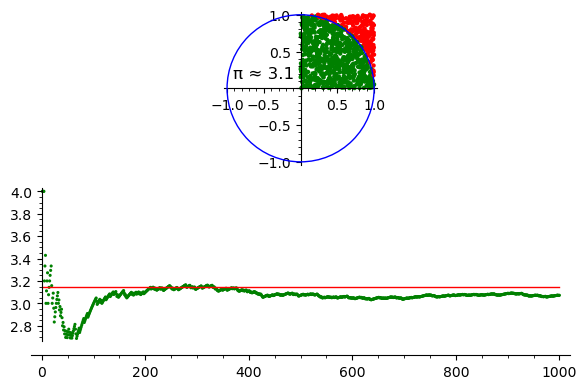

In [3]:
# συνολικός αριθμός σημείων
NN = 1000
# σημεία μέσα στον κύκλο
MM = 0          
tolerance = 1e-3
g1 = Graphics()
g2 = Graphics()
g2 += line([(0, pi), (NN, pi)], color='red')
for i in range(1,NN+1):
    x = RR.random_element(0,1)
    y = RR.random_element(0,1)
    if x^2 + y^2 <= 1:
        MM += 1
        g1 += point((x, y), color='green', size=10)
    else:
        g1 += point((x, y), color='red', size=10)
    g2 +=point((i,4*MM/i), color='green', size=5)
approx_pi = 4*MM/NN
txt = f"π ≈ {n(approx_pi, 6)}"
g1 += text(txt, (-0.5, 0.2), color='black', \
          fontsize=12, horizontal_alignment='center')
g1 += circle((0,0), 1, color='blue', fill=False)
#g.show(figsize=(3,3), gridlines='True')
#gpi.show(figsize=(4,3))
g = graphics_array([[g1],[g2]])
g.show()

Στο παραπάνω παράδειγμα έγινε χρήση της graphics_array για την παρουσίαση δύο γραφημάτων στον ίδιο καμβά. Η μέθοδος δέχεται λίστα με γραφήματα, παρουσιάζοντάς τα στην ίδια σειρά, ή λίστα με λίστες γραφημάτων όπως παραπάνω, παρουσιάζοντάς κάθε υπολίστα σε επόμενη σειρά.